In [ ]:
!nvidia-smi

Tue Dec 12 05:38:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 1.1 Import all the required libraries

In [ ]:
#Import all the required libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import tensorflow as tf
import keras
from keras.preprocessing.image import load_img
import string
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import Input
from PIL import Image

#used for creating Progress Meters or Progress Bars
from tqdm import tqdm


### 1.2 Install additional libraries required

We need to install the below libraries before proceeding :

**gTTS** - (Google Text-to-Speech)is a Python library and CLI tool to interface with Google Translate text-to-speech API. We will import the gTTS library from the gtts module which can be used for speech translation.

**playsound** - The playsound module is a cross platform module that can play audio files. This doesn't have any dependencies, simply install with pip in your virtualenv and run!

**display** - Public API for display tools in IPython

In [ ]:
# Install additional libraries required

!pip install wordcloud
!pip install gtts
!pip install playsound

     |████████████████████████████████| 62 kB 935 kB/s             
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
beatrix-jupyterlab 3.1.6 requires google-cloud-bigquery-storage, which is not installed.
spacy 3.2.2 requires typing-extensions<4.0.0.0,>=3.7.4; python_version < "3.8", but you have typing-extensions 4.1.1 which is incompatible.
gcsfs 2021.11.1 requires fsspec==2021.11.1, but you have fsspec 2022.2.0 which is incompatible.
apache-beam 2.34.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.4 which is incompatible.
apache-beam 2.34.0 requires httplib2<0.20.0,>=0.8, but you have httplib2 0.20.2 which is incompa

In [ ]:
import glob
from gtts import gTTS
from playsound import playsound
from IPython import display

import collections
import wordcloud
from wordcloud import WordCloud, STOPWORDS


### 1.3 Mount drive and import dataset

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flickr8k/captions.txt
/kaggle/input/flickr8k/Images/3226254560_2f8ac147ea.jpg
/kaggle/input/flickr8k/Images/214543992_ce6c0d9f9b.jpg
/kaggle/input/flickr8k/Images/2366643786_9c9a830db8.jpg
/kaggle/input/flickr8k/Images/3368819708_0bfa0808f8.jpg
/kaggle/input/flickr8k/Images/2190227737_6e0bde2623.jpg
/kaggle/input/flickr8k/Images/2752809449_632cd991b3.jpg
/kaggle/input/flickr8k/Images/3097776588_312932e438.jpg
/kaggle/input/flickr8k/Images/1206506157_c7956accd5.jpg
/kaggle/input/flickr8k/Images/1319634306_816f21677f.jpg
/kaggle/input/flickr8k/Images/2465218087_fca77998c6.jpg
/kaggle/input/flickr8k/Images/3351493005_6e5030f596.jpg
/kaggle/input/flickr8k/Images/2949337912_beba55698b.jpg
/kaggle/input/flickr8k/Images/534886684_a6c9f40fa1.jpg
/kaggle/input/flickr8k/Images/3543600125_223747ef4c.jpg
/kaggle/input/flickr8k/Images/2174206711_11cb712a8d.jpg
/kaggle/input/flickr8k/Images/280706862_14c30d734a.jpg
/kaggle/input/flickr8k/Images/2100735137_05c6079537.jpg
/kaggle/input/f


<a id="1"></a>
# <p style="background-color:slateblue;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">Let's Understand our Data</p>

## 2. Data Understanding and Visualization

1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create a dataframe which summarizes the image, path & captions as a dataframe

4.Create a list which contains all the captions & path

5.Visualise the top 30 occuring words in the captions



### 2.1 Import the dataset and read image & captions into two separate variables

In [ ]:
#Import the dataset and read the image into a seperate variable

images='/kaggle/input/flickr8k/Images'

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


### 2.2 Visualise both the images & text present in the dataset

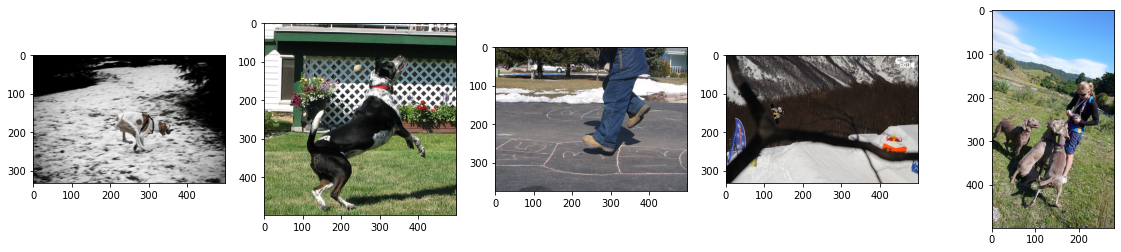

In [ ]:
#Visualise both the images & text present in the dataset
import imageio

#Visualising first 5 images :

Display_Images = all_imgs[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(20)

for ax, image in zip(axes, Display_Images):
  ax.imshow(imageio.imread(image), cmap=None)


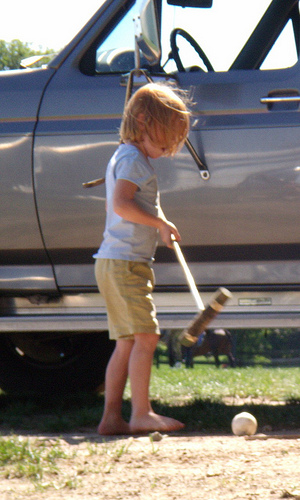

In [ ]:
# view a random image

import random
Image.open(all_imgs[random.randrange(50, 100, 3)])

In [ ]:
#Import the dataset and read the text file into a separate variable

#txt_file = 'Flickr8K/captions.txt'
text_file = '/kaggle/input/flickr8k/captions.txt'

def load_doc(filename):

    #your code here
    open_file = open(text_file, 'r', encoding='latin-1' ) #returns a file object
    text = open_file.read() #reads contents of the file
    open_file.close()
    #print(text)

    return text

doc = load_doc(text_file)
print(doc[:300])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing


##  Create a dataframe which summarizes the image, path & captions as a dataframe

    Create a dataframe which summarizes the image, path & captions as a dataframe

    Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

### 2.3 Create a list which contains all the captions & path

#### We will create three lists here and finally combine them to form a dataframe

    1. all_img_id = [] to store all the image id
    2. all_img_vector = [] to store all the image path
    3. annotations = []  to store all the captions

In [ ]:
img_path = '/kaggle/input/flickr8k/Images/'

all_img_id = [] #store all the image id here
all_img_vector = [] #store all the image path here
annotations = [] #store all the captions here

with open('/kaggle/input/flickr8k/captions.txt' , 'r') as fo:
  next(fo) #to skip the heading
  for line in fo :
    split_arr = line.split(',')
    all_img_id.append(split_arr[0])
    annotations.append(split_arr[1].rstrip('\n.')) #removing out the \n.
    all_img_vector.append(img_path+split_arr[0])

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions'])

df

ID  \
0      1000268201_693b08cb0e.jpg   
1      1000268201_693b08cb0e.jpg   
2      1000268201_693b08cb0e.jpg   
3      1000268201_693b08cb0e.jpg   
4      1000268201_693b08cb0e.jpg   
...                          ...   
40450   997722733_0cb5439472.jpg   
40451   997722733_0cb5439472.jpg   
40452   997722733_0cb5439472.jpg   
40453   997722733_0cb5439472.jpg   
40454   997722733_0cb5439472.jpg   

                                                    Path  \
0      /kaggle/input/flickr8k/Images/1000268201_693b0...   
1      /kaggle/input/flickr8k/Images/1000268201_693b0...   
2      /kaggle/input/flickr8k/Images/1000268201_693b0...   
3      /kaggle/input/flickr8k/Images/1000268201_693b0...   
4      /kaggle/input/flickr8k/Images/1000268201_693b0...   
...                                                  ...   
40450  /kaggle/input/flickr8k/Images/997722733_0cb543...   
40451  /kaggle/input/flickr8k/Images/997722733_0cb543...   
40452  /kaggle/input/flickr8k/Images/997722733_0cb543...   
40453  /kaggle/input/flickr8k/Images/997722733_0cb543...   
40454  /kaggle/input/flickr8k/Images/997722733_0cb543...   

                                                Captions  
0      A child in a pink dress is climbing up a set o...  
1                   A girl going into a wooden building   
2        A little girl climbing into a wooden playhouse   
3      A little girl climbing the stairs to her playh...  
4      A little girl in a pink dress going into a woo...  
...                                                  ...  
40450           A man in a pink shirt climbs a rock face  
40451            A man is rock climbing high in the air   
40452  A person in a red shirt climbing up a rock fac...  
40453                     A rock climber in a red shirt   
40454  A rock climber practices on a rock climbing wall   

[40455 rows x 3 columns]

In [ ]:
len (annotations)

40455

In [ ]:
type (annotations)

list

In [ ]:
#check total captions and images present in dataset

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_imgs)))

Total captions present in the dataset: 40455
Total images present in the dataset: 8091


In [ ]:
#Create the vocabulary & the counter for the captions
#lower() used to ensure same count irrespective of an alphabet's case

vocabulary = [word.lower() for line in annotations for word in line.split()]

val_count = Counter(vocabulary)
val_count

Counter({'a': 60196,
         'child': 1507,
         'in': 18174,
         'pink': 702,
         'dress': 332,
         'is': 9069,
         'climbing': 490,
         'up': 1215,
         'set': 105,
         'of': 6495,
         'stairs': 109,
         'an': 2325,
         'entry': 1,
         'way': 48,
         'girl': 3277,
         'going': 145,
         'into': 1046,
         'wooden': 278,
         'building': 485,
         'little': 1736,
         'playhouse': 6,
         'the': 17507,
         'to': 3005,
         'her': 1102,
         'cabin': 4,
         'black': 3620,
         'dog': 7948,
         'and': 8057,
         'spotted': 36,
         'are': 3365,
         'fighting': 130,
         'tri-colored': 12,
         'playing': 1954,
         'with': 7304,
         'each': 399,
         'other': 667,
         'on': 10357,
         'road': 380,
         'white': 3706,
         'brown': 2457,
         'spots': 28,
         'staring': 57,
         'at': 2810,
         'stree

### 2.5 Visualise the top 30 occuring words in the captions

a :  60196
in :  18174
the :  17507
on :  10357
is :  9069
and :  8057
dog :  7948
with :  7304
man :  7137
of :  6495
two :  5132
white :  3706
black :  3620
boy :  3514
are :  3365
woman :  3304
girl :  3277
to :  3005
wearing :  2916
people :  2811
at :  2810
water :  2676
young :  2587
red :  2553
brown :  2457


Text(0, 0.5, 'Count')

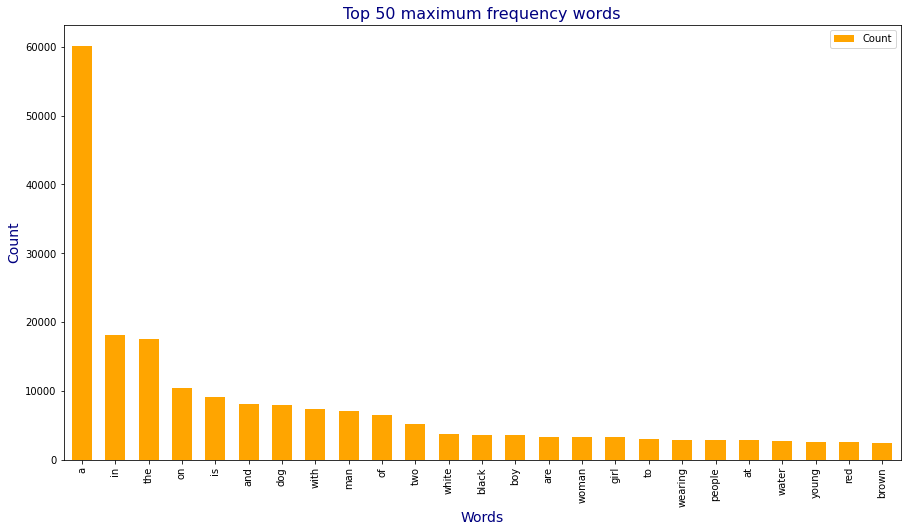

In [ ]:
#Visualise the top 25 occuring words in the captions

#write your code here
for word, count in val_count.most_common(25):
  print(word, ": ", count)

lst = val_count.most_common(25)
most_common_words_df = pd.DataFrame(lst, columns = ['Word', 'Count'])
most_common_words_df.plot.bar(x='Word', y='Count', width=0.6, color='orange', figsize=(15, 8))
plt.title("Top 50 maximum frequency words", fontsize = 16, color= 'navy')
plt.xlabel("Words", fontsize = 14, color= 'navy')
plt.ylabel("Count", fontsize = 14, color= 'navy')


### Clearly STOPWORDS form a clear majority

**Stop words are a set of commonly used words in a language.**

    Examples of stop words in English are “a”, “the”, “is”, “are” and etc.
    
*Stop words are commonly used in **Text Mining and Natural Language Processing (NLP)** to eliminate words that are so commonly used that they carry very little useful information.*

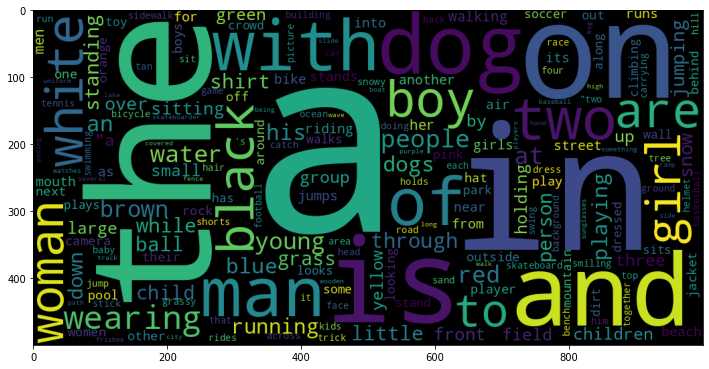

In [ ]:


wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(val_count)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

### Visualize the images and captions together

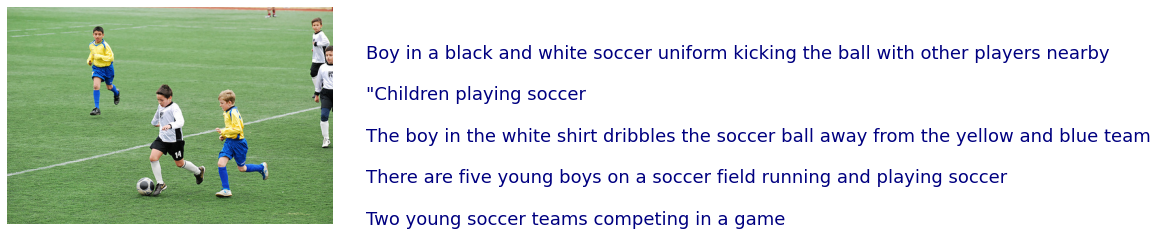

In [ ]:
def caption_with_img_plot(image_id, frame) :
  #get the captions
  capt = ("\n" *2).join(frame[frame['ID'] == image_id].Captions.to_list())
  fig, ax = plt.subplots()
  ax.set_axis_off()
  idx = df.ID.to_list().index(image_id)
  im =  Image.open(df.Path.iloc[idx])
  w, h = im.size[0], im.size[-1]
  ax.imshow(im)
  ax.text(w+50, h, capt, fontsize = 18, color = 'navy')
caption_with_img_plot(df.ID.iloc[8059], df)

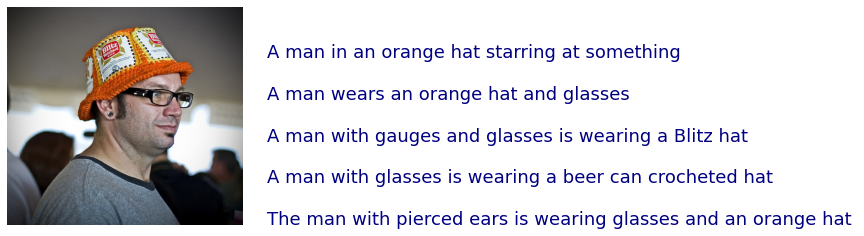

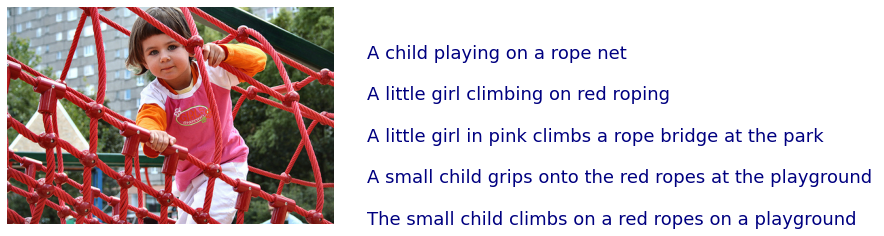

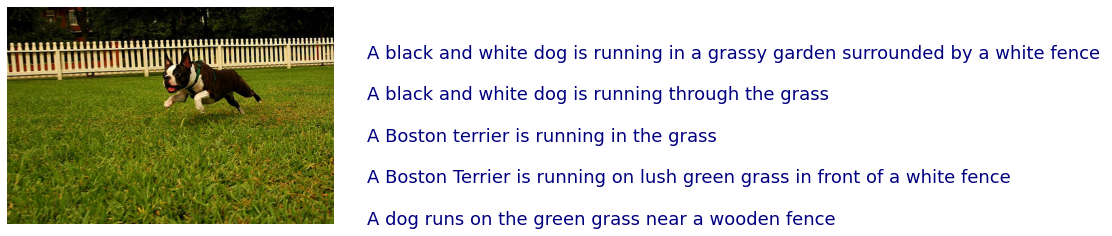

In [ ]:
def execute_img_capt(start, end, frame) :
  for r in range(start, end) :
    caption_with_img_plot(frame.ID.drop_duplicates().iloc[r], frame)

execute_img_capt(4, 7, df)

<a id="3"></a>
# <p style="background-color:slateblue;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">Clean Data</p>

1. Remove punctuations
2. Convert captions to lowercase
3. Retain words and eliminate numeric values

In [ ]:
#data cleaning
rem_punct = str.maketrans('', '', string.punctuation)
for r in range(len(annotations)) :
  line = annotations[r]
  line = line.split()

  # converting to lowercase
  line = [word.lower() for word in line]

  # remove punctuation from each caption and hanging letters
  line = [word.translate(rem_punct) for word in line]
  line = [word for word in line if len(word) > 1]

  # remove numeric values
  line = [word for word in line if word.isalpha()]

  annotations[r] = ' '.join(line)


In [ ]:
#add the <start> & <end> token to all those captions as well
annotations = ['<start>' + ' ' + line + ' ' + '<end>' for line in annotations]

#Create a list which contains all the path to the images
all_img_path = all_img_vector

In [ ]:
##list contatining captions for an image
annotations[6:10]

['<start> black dog and tricolored dog playing with each other on the road <end>',
 '<start> black dog and white dog with brown spots are staring at each other in the street <end>',
 '<start> two dogs of different breeds looking at each other on the road <end>',
 '<start> two dogs on pavement moving toward each other <end>']

<a id="4"></a>
# <p style="background-color:slateblue;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">Data Preprocessing</p>


### 4.1 Captions Preprocessing


Pre-Processing the captions

1. Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters.
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2. Replace all other words with the unknown token "UNK" .

3. Create word-to-index and index-to-word mappings.

4. Pad all sequences to be the same length as the longest one.

In [ ]:
# create the tokenizer

#your code here

top_word_cnt = 5000
tokenizer = Tokenizer(num_words = top_word_cnt+1, filters= '!"#$%^&*()_+.,:;-?/~`{}[]|\=@ ',
                      lower = True, char_level = False,
                      oov_token = 'UNK')

In [ ]:
# Create word-to-index and index-to-word mappings.

#your code here

tokenizer.fit_on_texts(annotations)

#transform each text into a sequence of integers
train_seqs = tokenizer.texts_to_sequences(annotations)

### Why Padding ?

 > Each individual image has **five captions which are all of different lengths**. Hence they **can't be fed directly to the Decoder.**
    
 > We will use **PADDING, to bring all captions to a fixed length** before proceeding further.

 > Padding is a process that we apply at the **start or the end of a sequence to make all the samples to have a common standard length.**
    
 > For text generation, the **decoder needs to have an input at the start and it can't be a padded input.**
    
 > Therefore, for our process, we will be doing the **padding at the end** (of the caption sequence).

 > All **padded values will be masked and set to 'False' while the rest will be set to 'True'**
    
 > **All True values are assigned the value : 1, while padded, i.e False values are set to 0**
    
    
*Padding can result in a risk of adding penalty to the model.*

*We apply masking to rectify the same and this will truncate down all the added penalties back to zero :*

    
### Loss  = Loss * Mask

As we will use pad_sequence to process the sequence, we will use 0 as the padding value.

 > Keras uses a different index for UNKNOWN, in order to distinguish between PAD and UNKNOWN

  > 0 is the reserved index which has no word assigned.

In [ ]:
# we add PAD token for zero

tokenizer.word_index['PAD'] = 0
tokenizer.index_word[0] = 'PAD'

In [ ]:
print(tokenizer.oov_token)
print(tokenizer.index_word[0])

UNK
PAD


#### View index words

In [ ]:
tokenizer.index_word

{1: 'UNK',
 2: '<start>',
 3: '<end>',
 4: 'in',
 5: 'the',
 6: 'on',
 7: 'is',
 8: 'and',
 9: 'dog',
 10: 'with',
 11: 'man',
 12: 'of',
 13: 'two',
 14: 'white',
 15: 'black',
 16: 'boy',
 17: 'are',
 18: 'woman',
 19: 'girl',
 20: 'to',
 21: 'wearing',
 22: 'people',
 23: 'at',
 24: 'water',
 25: 'young',
 26: 'red',
 27: 'brown',
 28: 'an',
 29: 'his',
 30: 'blue',
 31: 'dogs',
 32: 'running',
 33: 'through',
 34: 'playing',
 35: 'while',
 36: 'down',
 37: 'little',
 38: 'shirt',
 39: 'standing',
 40: 'ball',
 41: 'grass',
 42: 'person',
 43: 'child',
 44: 'snow',
 45: 'jumping',
 46: 'over',
 47: 'three',
 48: 'front',
 49: 'sitting',
 50: 'small',
 51: 'field',
 52: 'up',
 53: 'holding',
 54: 'large',
 55: 'group',
 56: 'by',
 57: 'green',
 58: 'yellow',
 59: 'children',
 60: 'walking',
 61: 'men',
 62: 'her',
 63: 'into',
 64: 'beach',
 65: 'air',
 66: 'near',
 67: 'jumps',
 68: 'mouth',
 69: 'street',
 70: 'runs',
 71: 'for',
 72: 'another',
 73: 'riding',
 74: 'from',
 75: 'it

In [ ]:
# Create a word count of your tokenizer to visualize the Top 50 occuring words after text processing

#your code here
tokenizer_top_words = [word for line in annotations for word in line.split() ]

#tokenizer_top_words_count
tokenizer_top_words_count = collections.Counter(tokenizer_top_words)
tokenizer_top_words_count

Counter({'<start>': 40455,
         'child': 1517,
         'in': 18182,
         'pink': 702,
         'dress': 332,
         'is': 9069,
         'climbing': 490,
         'up': 1215,
         'set': 105,
         'of': 6496,
         'stairs': 109,
         'an': 2358,
         'entry': 1,
         'way': 48,
         '<end>': 40455,
         'girl': 3284,
         'going': 145,
         'into': 1046,
         'wooden': 278,
         'building': 485,
         'little': 1750,
         'playhouse': 6,
         'the': 17676,
         'to': 3005,
         'her': 1102,
         'cabin': 4,
         'black': 3627,
         'dog': 7956,
         'and': 8057,
         'spotted': 36,
         'are': 3365,
         'fighting': 130,
         'tricolored': 12,
         'playing': 1954,
         'with': 7308,
         'each': 399,
         'other': 667,
         'on': 10367,
         'road': 380,
         'white': 3710,
         'brown': 2471,
         'spots': 28,
         'staring': 57,
      

<start> :  40455
<end> :  40455
in :  18182
the :  17676
on :  10367
is :  9069
and :  8057
dog :  7956
with :  7308
man :  7164
of :  6496
two :  5546
white :  3710
black :  3627
boy :  3534
are :  3365
woman :  3320
girl :  3284
to :  3005
wearing :  2917
people :  2837
at :  2819
water :  2676
young :  2610
red :  2553


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  if sys.path[0] == '':


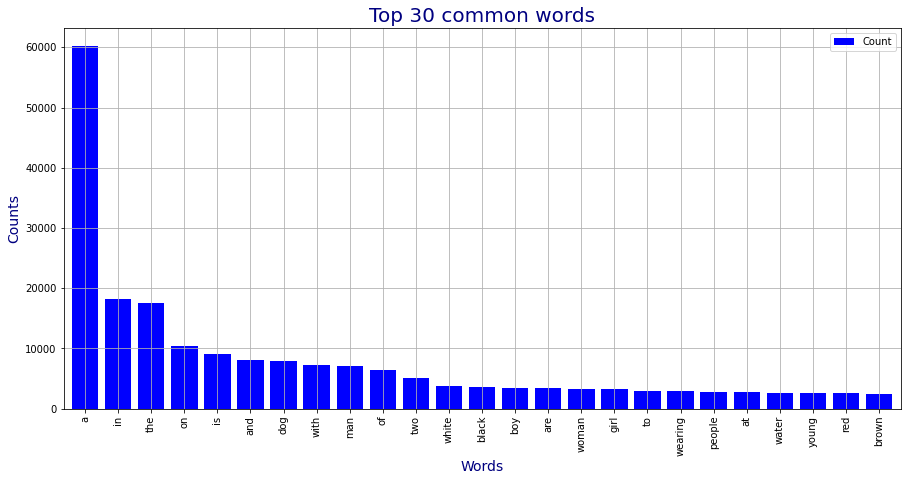

In [ ]:
for word, count in tokenizer_top_words_count.most_common(25) :
  print(word, ": ", count)

tokens = tokenizer_top_words_count.most_common(25)
most_com_words_df = pd.DataFrame(tokens, columns = ['Word', 'Count'])

#plot 30 most common words
most_common_words_df.plot.bar(x = 'Word', y= 'Count', width=0.8, color = 'blue', figsize = (15, 7))
plt.title('Top 30 common words', fontsize =20, color= 'navy')
plt.xlabel('Words', fontsize =14, color= 'navy')
plt.ylabel('Counts', fontsize =14, color= 'navy')
plt.grid(b=None)

### Let's view the frequency of words now, post Captions preprocessing

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  after removing the cwd from sys.path.


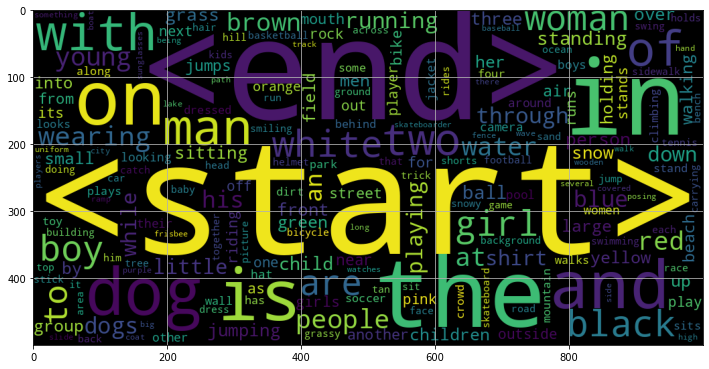

In [ ]:
wordcloud_token = WordCloud(width = 1000, height = 500).generate_from_frequencies(tokenizer_top_words_count)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud_token)
plt.grid(b = None)

In [ ]:
# Pad each vector to the max_length of the captions ^ store it to a vairable

#store the length of all lists
train_seqs_len = [len(seq) for seq in train_seqs]

#store elements from list with maximum value
longest_word_length = max(train_seqs_len)

#calculate longest word_length and pads all sequences to equal length as that of the longest.
cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding= 'post', maxlen = longest_word_length,
                                                          dtype='int32', value=0)

print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 31)


**NOTE :** Using padding = 'post', we are padding zero at last. Starting word always acts as a crucial prompter and another word is expected after that. Zero at the beginning would indicate no value.

Hence in order to maintain existing sequence and it's meaning, we **apply PADDING at the end.**

## 4.2 Pre-processing the images

1.Resize them into the shape of (299, 299)

2.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3.

In [ ]:
# creating list to store preprocessed images and setting up the Image Shape

preprocessed_image = []
IMAGE_SHAPE = (299, 299)

In [ ]:
#checking image format

tf.keras.backend.image_data_format()


'channels_last'

**Image data format = 'channels_last' indicates Image is in three dimensional array, where third dim represents color channels (RGB)**

1st dim = rows

2nd dim = columns

3rd dim = channels

In [ ]:


#write your pre-processing steps here (checking only for the first five images here)
for img in all_imgs[0:5] :
    img = tf.io.read_file(img, name=None)

    # we need to decode jpeg encoded images (here by default channels = 0)
    img = tf.image.decode_jpeg(img, channels=0)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)

    #append preprocessed images to the list
    preprocessed_image.append(img)


Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)


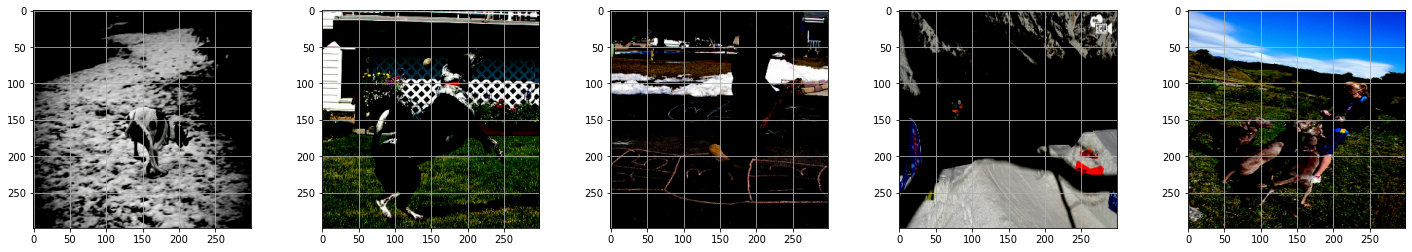

In [ ]:
# checking first five images post preprocessing

Display_Images = preprocessed_image[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(25)

for ax, image in zip(axes, Display_Images) :
  print('Shape after resize : ', image.shape)
  ax.imshow(image)
  ax.grid('off')



<a id="5"></a>
# <p style="background-color:slateblue;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">Dataset Creation</p>

1.Create a function which maps the image path to their feature.

2.Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset

3.Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 80-20 ratio & random state = 42

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)

**We will have a function here for preprocessing and returing images, so that we can use it for vectorization and preprocesses images parallelly**

In [ ]:
## write your code here for applying the function to the image path dataset,
## such that the transformed dataset should contain images & their path


def load_images(image_path) :
  img = tf.io.read_file(image_path, name = None)
  img = tf.image.decode_jpeg(img, channels=0)
  img = tf.image.resize(img, IMAGE_SHAPE)
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  return img, image_path

In [ ]:
all_img_vector

['/kaggle/input/flickr8k/Images/1000268201_693b08cb0e.jpg',
 '/kaggle/input/flickr8k/Images/1000268201_693b08cb0e.jpg',
 '/kaggle/input/flickr8k/Images/1000268201_693b08cb0e.jpg',
 '/kaggle/input/flickr8k/Images/1000268201_693b08cb0e.jpg',
 '/kaggle/input/flickr8k/Images/1000268201_693b08cb0e.jpg',
 '/kaggle/input/flickr8k/Images/1001773457_577c3a7d70.jpg',
 '/kaggle/input/flickr8k/Images/1001773457_577c3a7d70.jpg',
 '/kaggle/input/flickr8k/Images/1001773457_577c3a7d70.jpg',
 '/kaggle/input/flickr8k/Images/1001773457_577c3a7d70.jpg',
 '/kaggle/input/flickr8k/Images/1001773457_577c3a7d70.jpg',
 '/kaggle/input/flickr8k/Images/1002674143_1b742ab4b8.jpg',
 '/kaggle/input/flickr8k/Images/1002674143_1b742ab4b8.jpg',
 '/kaggle/input/flickr8k/Images/1002674143_1b742ab4b8.jpg',
 '/kaggle/input/flickr8k/Images/1002674143_1b742ab4b8.jpg',
 '/kaggle/input/flickr8k/Images/1002674143_1b742ab4b8.jpg',
 '/kaggle/input/flickr8k/Images/1003163366_44323f5815.jpg',
 '/kaggle/input/flickr8k/Images/10031633

In [ ]:
# Map each image full path to the function, in order to preprocess the image

## sort the unique paths and store in a list
training_list = sorted(set(all_img_vector))

#create a new dataset from above training list
New_Img = tf.data.Dataset.from_tensor_slices(training_list)

#map load_images function across the elements of the new dataset above
New_Img = New_Img.map(load_images, num_parallel_calls = tf.data.experimental.AUTOTUNE)
#Note  : Here, num_parallel_calls = tf.data.experimental.AUTOTUNE sets the number of parallel calls dynamically.
            ## based on the current GPU/CPU

#setting a batch size of 64
New_Img = New_Img.batch(64, drop_remainder=False)
#Note : As we don't want to drop the last batch if it contains less than 64 elements, we set drop_remainder to false

**Note :** As we didn't want to drop the last batch if it contains less than 64 elements, we **set drop_remainder to false**

In [ ]:
New_Img

<BatchDataset shapes: ((None, 299, 299, None), (None,)), types: (tf.float32, tf.string)>

In [ ]:
#Ratio = 80:20 and we will set random state = 56

path_train, path_test, caption_train, caption_test = train_test_split(all_img_vector, cap_vector, test_size = 0.2, random_state = 56)

In [ ]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(caption_train)))
print("Testing data for Captions: " + str(len(caption_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


### Load the pretrained Imagenet weights of Inception net V3


    1.To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

    2.The shape of the output of this layer is 8x8x2048.

    3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [ ]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input #write code here to get the input of the image_model
hidden_layer = image_model.layers[-1].output  #write code here to get the output of the image_model

#build the final model using both input & output layer
image_features_extract_model = tf.compat.v1.keras.Model(new_input, hidden_layer)

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
# write the code to apply the feature_extraction model to your earlier created dataset which contained images & their respective paths
# Once the features are created, you need to reshape them such that feature shape is in order of (batch_size, 8*8, 2048)

image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

### NOTE : As we are not classifying the images here, there is no need to have the softmax layer at the end.

### FAQs on how to load the features:

* You can load the features using a dictionary created OR
* You can store using numpy(np.load) to load the feature vector.

In [ ]:
# extract features from each image in the dataset

img_features = {}
for image, image_path in tqdm(New_Img) :
  # we are using tqdm for progress bar

  # feed images from newly created Dataset above to Inception V3 built above
  batch_features = image_features_extract_model(image)
  #squeeze out the features in a batch
  batch_features_flattened = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))

  for batch_feat, path in zip(batch_features_flattened, image_path) :
    feature_path = path.numpy().decode('utf-8')
    img_features[feature_path] = batch_feat.numpy()

100%|██████████| 127/127 [00:35<00:00,  3.63it/s]


In [ ]:
batch_features

<tf.Tensor: shape=(27, 8, 8, 2048), dtype=float32, numpy=
array([[[[0.00000000e+00, 7.73590952e-02, 0.00000000e+00, ...,
          2.31990203e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.07845321e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 1.94018483e-01, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 1.85825527e-01],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          9.42283124e-02, 0.00000000e+00, 5.05860507e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 4.23104107e-01, 1.33328093e-02, ...,
          2.33793616e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         

In [ ]:
batch_features_flattened

<tf.Tensor: shape=(27, 64, 2048), dtype=float32, numpy=
array([[[0.0000000e+00, 7.7359095e-02, 0.0000000e+00, ...,
         2.3199020e-01, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.0784532e-01, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 1.9401848e-01, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 1.8582553e-01],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 1.6567849e+00, 0.0000000e+00],
        [0.0000000e+00, 4.0278664e-01, 0.0000000e+00, ...,
         0.0000000e+00, 3.1788370e-01, 0.0000000e+00],
        [0.0000000e+00, 2.5347657e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.2506980e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 7.8535922e-02, ...,
         1.2066435e+00, 0.0000000e+00, 0.0000000e+00],
        [0.000000

In [ ]:
len(img_features)

8091

In [ ]:
batch_feat.shape

TensorShape([64, 2048])

In [ ]:
#view top five items of img_features dict
import more_itertools
top_5 = more_itertools.take(5, img_features.items())

top_5

[('/kaggle/input/flickr8k/Images/1000268201_693b08cb0e.jpg',
  array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.16974054],
         [0.        , 0.        , 1.010611  , ..., 0.        , 0.        ,
          0.06097883],
         ...,
         [0.        , 0.        , 2.0379    , ..., 1.2028438 , 0.        ,
          1.9921616 ],
         [0.        , 0.        , 0.9049651 , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 1.2525549 , 0.        , ..., 0.        , 0.        ,
          0.        ]], dtype=float32)),
 ('/kaggle/input/flickr8k/Images/1001773457_577c3a7d70.jpg',
  array([[0.        , 0.6636746 , 0.4626771 , ..., 0.        , 0.        ,
          3.3319137 ],
         [0.        , 1.2268904 , 0.        , ..., 0.        , 0.25379413,
          3.3291464 ],
         [1.2878833 , 1.5193076 , 0.        , ..., 0.46765655,

### FAQs on how to store the features:
* You can store the features using a dictionary with the path as the key and values as the feature extracted by the inception net v3 model OR
* You can store using numpy(np.save) to store the resulting vector.

#### We will now feed both, the images as well as  the captions to the model

In [ ]:
#to provide, both images along with the captions as input
def map(image_name, caption):

    # your code goes here to create the dataset & transform it

    img_tensor = img_features[image_name.decode('utf-8')]
    return img_tensor, caption

#### We will set the bufffer size to 1000 and batch size to 64

    In Tensorflow, data is designed to work with huge sequences. Thus instead of shuffling entire sequence, it maintains separate buffer within which it shuffles elements. This buffer size of 1000 refers to the same.
    
    
    We will set reshuffle_each_iteration to True in order to ensure different order per epoch
    
    We will also use the prefetch function to prepare later elements as the current ones are being processed


In [ ]:
# create a builder function to create dataset which takes in the image path & captions as input
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier

BUFFER_SIZE = 1500
BATCH_SIZE = 32
def gen_dataset(img, capt):

    # your code goes here to create the dataset & transform it

    data = tf.data.Dataset.from_tensor_slices((img, capt))
    # dataset created using tf.data.Dataset.from_tensor_slices
    data = data.map(lambda ele1, ele2 : tf.numpy_function(map, [ele1, ele2], [tf.float32, tf.int32]),
                    num_parallel_calls = tf.data.experimental.AUTOTUNE)


    data = (data.shuffle(BUFFER_SIZE, reshuffle_each_iteration= True).batch(BATCH_SIZE, drop_remainder = False)
    .prefetch(tf.data.experimental.AUTOTUNE))
    # .prefetch() is used to prepare all upcoming elements, while current elements are being processed
    # We set reshuffle_each_iteration set to True in order to ensure different order per epoch
    # Also,  drop_remainder is set to False as we don't want to miss out any element if the last batch contains less than 64 elements

    return data

In [ ]:
train_dataset = gen_dataset(path_train,caption_train)
test_dataset = gen_dataset(path_test,caption_test)

In [ ]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(32, 64, 2048)
(32, 31)


<a id="1"></a>
# <p style="background-color:slateblue;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">Model Building</p>

    1.Set the parameters

    2.Build the Encoder

    3. Build the Attention Model

    4. Build the Decoder

In [ ]:
# Setting  parameters

embedding_dim = 256
units = 512

#top 5,000 words +1
vocab_size = 5001
train_num_steps = len(path_train) // BATCH_SIZE #len(total train images) // BATCH_SIZE
test_num_steps = len(path_test) // BATCH_SIZE  #len(total test images) // BATCH_SIZE

max_length = 31
feature_shape = batch_feat.shape[1]
attention_feature_shape = batch_feat.shape[0]

## Encoder (CNN)

    1. The encoder parts involve the convolution of the input image with the help of various convolution, max pooling, and fully connected layers.

    2. Since we are not dealing with the classification of the image, we have removed them from the end.

    3. The final output of the encoder part will be the generation of the feature vector.

In [ ]:
tf.compat.v1.reset_default_graph()
print(tf.compat.v1.get_default_graph())

In [ ]:
#Building Encoder using CNN Keras subclassing method

class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim) #build your Dense layer with relu activation

    def call(self, features):
        features =  self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features =  tf.keras.activations.relu(features, alpha=0.01, max_value=None, threshold=0)
        return features

In [ ]:
encoder=Encoder(embedding_dim)

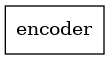

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(encoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Note :

 > The **CNN-based encoder produces the feature vector which is the encoded representation of the input image.**

 > The resulting **feature vector is static** and does not change at each timestamp.
    
 > Therefore we need to pass this vector to the **attention model along with the hidden state of the decoder to create the context vector**.

## Attention model

#### Important Details :

 > **Attention is an interface connecting the encoder and decoder that provides the decoder with information from every encoder hidden state.**

 > With this framework, the model is able to **selectively focus on valuable parts of the input sequence** and hence, learn the association between them.

 > The attention model produces an **output(context vector) that is fed to the decoder** for predicting the word at that timestamp

 > This output, i.e **context vector is adaptive in nature and change for each timestamp.**

 > It aims to overcome the limitation of traditional CNN-RNN based models. Using this, **instead of passing the complete input image to the RNN at every timestamp, we can pass different relevant parts of the image to it.**

 > This makes the model **faster and increase it's prediction accuracy.**

In [ ]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units) #build your Dense layer
        self.W2 = tf.keras.layers.Dense(units) #build your Dense layer
        self.V = tf.keras.layers.Dense(1) #build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        # features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)

        # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        hidden_with_time_axis = hidden[:, tf.newaxis]

        # build your score funciton to shape: (batch_size, 8*8, units)
        score = tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))

        # extract your attention weights with shape: (batch_size, 8*8, 1)
        attention_weights = tf.keras.activations.softmax(self.V(score), axis=1)

        #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = attention_weights * features

        # reduce the shape to (batch_size, embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

### Note

    1. Attention model does a linear transformation of input. Hence we have aplied tanh on top of it, in order to introduce non-linearities and achieve a smoother distribution.
    
    2. The features produced from fully connected dense layer of encoder and the hidden state of decoder are fed to tanh function and attention score is calculated
    
    3. As we require an output in range (0,1), we will apply softmax function to attention score and get the final attention weights

## Decoder

    RNN - Model (GRU)

 > **Input to GRU : Context vector (from attention model) concatenated with  embedded vector (embedding layer)**. Output of this concatenation layer is fed to GRU as input

  > **Embedding layer present inside the decoder takes the input sequence** (preprocessed and transformed such that all samples have equal sequence length - through padding followed by masking). Embedding layer transforms this into an embedded vector.
  
  > **Concatenation layer contains : Embedded vector (output of embedding layer) along with the Context vector** (output of attention model)

In [ ]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units) #iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size) #build your Dense layer


    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) #create your context vector & attention weights from attention model
        embed = self.embed(x) # embed your input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis = -1) # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)

        return output, state, attention_weights

    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [ ]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [ ]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (32, 64, 256)
Predcitions shape from Decoder: (32, 5001)
Attention weights shape from Decoder: (32, 64, 1)


<a id="7"></a>
# <p style="background-color:slateblue;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">Model Training and Evaluation</p>
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)  #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction = tf.keras.losses.Reduction.NONE) #define your loss object

In [ ]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    #loss is getting multiplied with mask to get an ideal shape

    return tf.reduce_mean(loss_)

In [ ]:
checkpoint_path = "Flickr8K/checkpoint1"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [ ]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [ ]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    with tf.GradientTape() as tape:
        #write your code here to do the training steps
        encoder_op = encoder(img_tensor)

        #apply teacher forcing by passing target word as next input to the decoder
        for r in range(1, target.shape[1]) :
          #pass encoder_op to decoder
          predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
          loss = loss + loss_function(target[:, r], predictions)
          dec_input = tf.expand_dims(target[:, r], 1)

    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) # calculating gradient wrt each trainable var

    #we will now compute the gradients and apply it to the optimizer while backpropagating
    optimizer.apply_gradients(zip(grad, trainable_vars))

    return loss, avg_loss

* While creating the test step for your model, you will pass your previous prediciton as the next input to the decoder.

In [ ]:
@tf.function
def test_step(img_tensor, target):
    loss = 0

    #write your code here to do the testing steps
    hidden = decoder.init_state(batch_size = target.shape[0])

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:
      encoder_op = encoder(img_tensor)

      #apply teacher forcing again
      for r in range(1, target.shape[1]) :
        #pass encoder_op to decoder
        predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
        loss = loss + loss_function(target[:, r], predictions)

        dec_input = tf.expand_dims(target[: , r], 1)

    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) # calculating gradient wrt each trainable var

    #we will now compute the gradients and apply it to the optimizer while backpropagating
    optimizer.apply_gradients(zip(grad, trainable_vars))


    return loss, avg_loss

In [ ]:
def test_loss_cal(test_dataset):
    total_loss = 0

    #write your code to get the average loss result on your test data
    for (batch, (img_tensor, target)) in enumerate(test_dataset) :
      batch_loss, t_loss = test_step(img_tensor, target)
      total_loss = total_loss + t_loss
      avg_test_loss = total_loss/ test_num_steps

    return avg_test_loss

In [ ]:
loss_plot = []
test_loss_plot = []
EPOCHS = 20

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps

    loss_plot.append(avg_train_loss)
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)

    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  5%|▌         | 1/20 [01:41<32:05, 101.32s/it]

For epoch: 1, the train loss is 1.080, & test loss is 1.027
Time taken for 1 epoch 101.1821129322052 sec

Test loss has been reduced from 100.000 to 1.027


 10%|█         | 2/20 [03:22<30:22, 101.25s/it]

For epoch: 2, the train loss is 0.980, & test loss is 0.945
Time taken for 1 epoch 101.07133483886719 sec

Test loss has been reduced from 1.027 to 0.945


 15%|█▌        | 3/20 [05:03<28:40, 101.23s/it]

For epoch: 3, the train loss is 0.907, & test loss is 0.877
Time taken for 1 epoch 101.0600233078003 sec

Test loss has been reduced from 0.945 to 0.877


 20%|██        | 4/20 [06:44<26:58, 101.13s/it]

For epoch: 4, the train loss is 0.846, & test loss is 0.820
Time taken for 1 epoch 100.85707664489746 sec

Test loss has been reduced from 0.877 to 0.820


 25%|██▌       | 5/20 [08:25<25:16, 101.11s/it]

For epoch: 5, the train loss is 0.791, & test loss is 0.767
Time taken for 1 epoch 100.91251754760742 sec

Test loss has been reduced from 0.820 to 0.767


 30%|███       | 6/20 [10:06<23:35, 101.08s/it]

For epoch: 6, the train loss is 0.741, & test loss is 0.717
Time taken for 1 epoch 100.85489344596863 sec

Test loss has been reduced from 0.767 to 0.717


 35%|███▌      | 7/20 [11:47<21:53, 101.06s/it]

For epoch: 7, the train loss is 0.695, & test loss is 0.673
Time taken for 1 epoch 100.87635946273804 sec

Test loss has been reduced from 0.717 to 0.673


 40%|████      | 8/20 [13:28<20:11, 100.94s/it]

For epoch: 8, the train loss is 0.660, & test loss is 0.635
Time taken for 1 epoch 100.5163984298706 sec

Test loss has been reduced from 0.673 to 0.635


 45%|████▌     | 9/20 [15:09<18:30, 100.92s/it]

For epoch: 9, the train loss is 0.618, & test loss is 0.598
Time taken for 1 epoch 100.71046543121338 sec

Test loss has been reduced from 0.635 to 0.598


 50%|█████     | 10/20 [16:50<16:48, 100.88s/it]

For epoch: 10, the train loss is 0.584, & test loss is 0.567
Time taken for 1 epoch 100.64297866821289 sec

Test loss has been reduced from 0.598 to 0.567


 55%|█████▌    | 11/20 [18:30<15:07, 100.80s/it]

For epoch: 11, the train loss is 0.553, & test loss is 0.538
Time taken for 1 epoch 100.46200680732727 sec

Test loss has been reduced from 0.567 to 0.538


 60%|██████    | 12/20 [20:11<13:26, 100.79s/it]

For epoch: 12, the train loss is 0.527, & test loss is 0.511
Time taken for 1 epoch 100.6291241645813 sec

Test loss has been reduced from 0.538 to 0.511


 65%|██████▌   | 13/20 [21:52<11:45, 100.79s/it]

For epoch: 13, the train loss is 0.501, & test loss is 0.485
Time taken for 1 epoch 100.63622856140137 sec

Test loss has been reduced from 0.511 to 0.485


 70%|███████   | 14/20 [23:33<10:04, 100.77s/it]

For epoch: 14, the train loss is 0.478, & test loss is 0.464
Time taken for 1 epoch 100.5928385257721 sec

Test loss has been reduced from 0.485 to 0.464


 75%|███████▌  | 15/20 [25:13<08:24, 100.80s/it]

For epoch: 15, the train loss is 0.457, & test loss is 0.442
Time taken for 1 epoch 100.72277593612671 sec

Test loss has been reduced from 0.464 to 0.442


 80%|████████  | 16/20 [26:54<06:43, 100.78s/it]

For epoch: 16, the train loss is 0.437, & test loss is 0.426
Time taken for 1 epoch 100.57599115371704 sec

Test loss has been reduced from 0.442 to 0.426


 85%|████████▌ | 17/20 [28:35<05:02, 100.78s/it]

For epoch: 17, the train loss is 0.422, & test loss is 0.408
Time taken for 1 epoch 100.6396734714508 sec

Test loss has been reduced from 0.426 to 0.408


 90%|█████████ | 18/20 [30:16<03:21, 100.74s/it]

For epoch: 18, the train loss is 0.404, & test loss is 0.394
Time taken for 1 epoch 100.50325894355774 sec

Test loss has been reduced from 0.408 to 0.394


 95%|█████████▌| 19/20 [31:56<01:40, 100.71s/it]

For epoch: 19, the train loss is 0.390, & test loss is 0.376
Time taken for 1 epoch 100.47766017913818 sec

Test loss has been reduced from 0.394 to 0.376


100%|██████████| 20/20 [33:37<00:00, 100.86s/it]

For epoch: 20, the train loss is 0.376, & test loss is 0.370
Time taken for 1 epoch 100.41589617729187 sec

Test loss has been reduced from 0.376 to 0.370


## Test loss after 20 epochs = 0.370



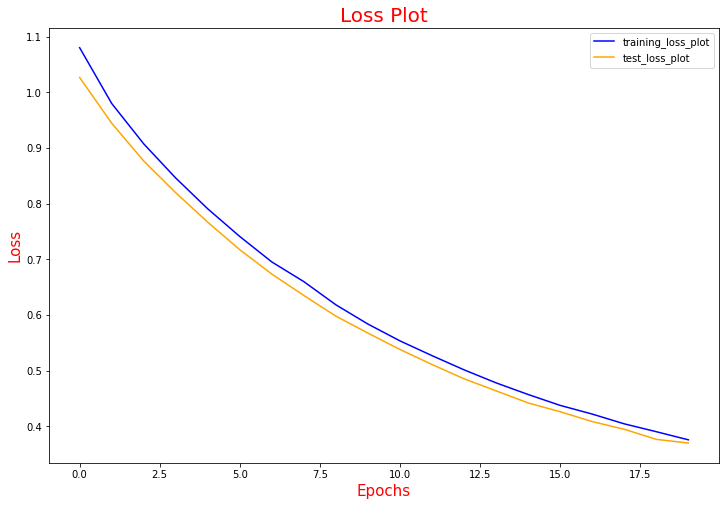

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8))
plt.plot(loss_plot, color='blue', label = 'training_loss_plot')
plt.plot(test_loss_plot, color='orange', label = 'test_loss_plot')
plt.xlabel('Epochs', fontsize = 15, color = 'red')
plt.ylabel('Loss', fontsize = 15, color = 'red')
plt.title('Loss Plot', fontsize = 20, color = 'red')
plt.legend()
plt.show()


In [ ]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_feature_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_images(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input) # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder (img_tensor_val) # extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden) # get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy() #extract the predicted id(embedded value) which carries the max value
        #map the id to the word from tokenizer and append the value to the result list
        result.append (tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


In [ ]:
def plot_attention_map (caption, weights, image) :

  fig = plt.figure(figsize = (10, 10))
  temp_img = np.array(Image.open(image))

  cap_len = len(caption)
  for cap in range(cap_len) :
    weights_img = np.reshape(weights[cap], (8,8))
    wweights_img = np.array(Image.fromarray(weights_img).resize((224,224), Image.LANCZOS))

    ax = fig.add_subplot(cap_len//2, cap_len//2, cap+1)
    ax.set_title(caption[cap], fontsize = 14, color = 'red')

    img = ax.imshow(temp_img)

    ax.imshow(weights_img, cmap='gist_heat', alpha=0.6, extent=img.get_extent())
    ax.axis('off')
  plt.subplots_adjust(hspace=0.2, wspace=0.2)
  plt.show()

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
def filt_text(text):
    filt=['<start>','<unk>','<end>']
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [ ]:
image_test = path_test.copy()

In [ ]:
def pred_caption_audio(random, autoplay=False, weights=(0.5, 0.5, 0, 0)) :

    cap_test_data = caption_test.copy()
    rid = np.random.randint(0, random)
    test_image = image_test[rid]
    #test_image = './images/413231421_43833a11f5.jpg'
    #real_caption = '<start> black dog is digging in the snow <end>'

    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test_data[rid] if i not in [0]])
    result, attention_plot, pred_test = evaluate(test_image)


    real_caption=filt_text(real_caption)


    pred_caption=' '.join(result).rsplit(' ', 1)[0]


    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()

    score = sentence_bleu(reference, candidate, weights=weights)#set your weights
    print(f"BELU score: {score*100}")
    print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)
    plot_attention_map(result, attention_plot, test_image)

    # we will make use of Google Text to Speech API (online), which will convert the caption to audio
    speech = gTTS('Predicted Caption : ' + pred_caption, lang = 'en', slow = False)
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'

    display.display(display.Audio(audio_file, rate = None, autoplay = autoplay))

    return test_image



<a id="8"></a>
# <p style="background-color:slateblue;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">Model Testing</p>


 > **Our evaluation metric : BLUE SCORE** (Bilingual Evaluation Understudy)



##testing

/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 25.819888974716115
Real Caption: two little girls play by hotel pool
Prediction Caption: young girl jumps feet first into swimming pool while another little girl and girl stands and kids swimming pool while another little girl and girl stands and kids swimming pool


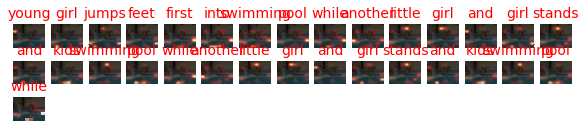

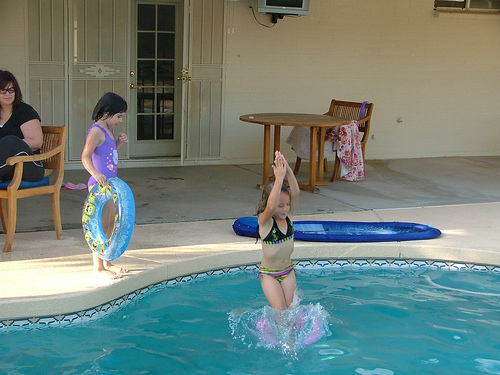

In [ ]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 63.245553203367585
Real Caption: snowboarder flies in the air
Prediction Caption: the snowboarder is performing stunt


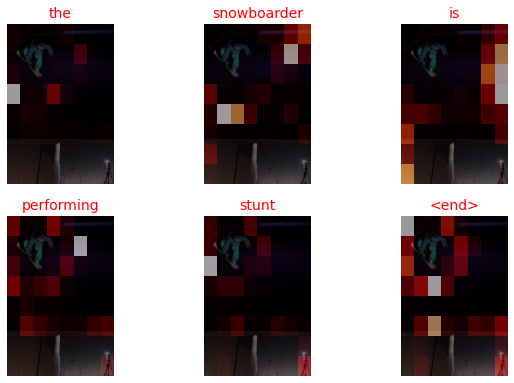

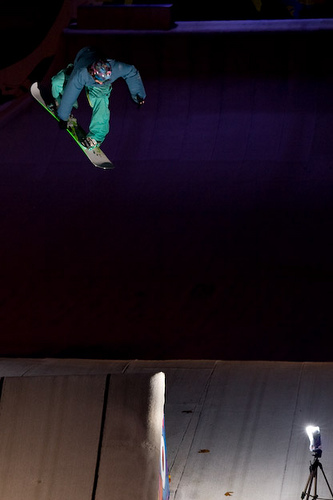

In [ ]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

### WOW!! 100% accuracy as indicated by BLEU Score

# <p style="background-color:white;font-family:seoge print;color:slateblue ;font-size:100%;text-align:left;border-radius:20px 60px;">Test Image 2</p>

/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 33.33333333333333
Real Caption: several little boys play indoor soccer
Prediction Caption: number of soccer players about to get the goal


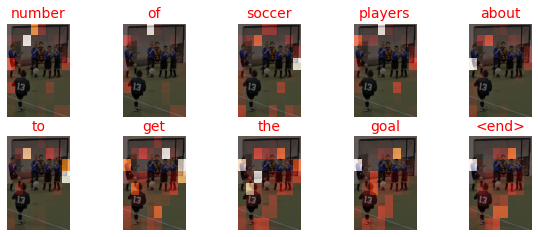

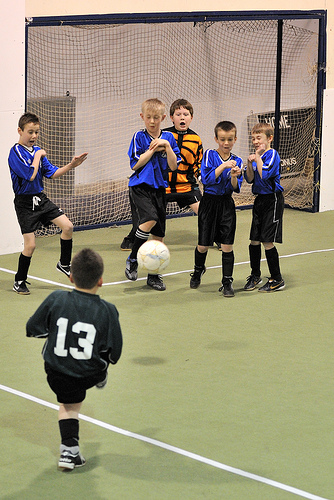

In [ ]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

# <p style="background-color:white;font-family:seoge print;color:slateblue ;font-size:100%;text-align:left;border-radius:20px 60px;">Test Image 3</p>

/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 18.09829081062401
Real Caption: man jumps train cars with his bike
Prediction Caption: person jumps train


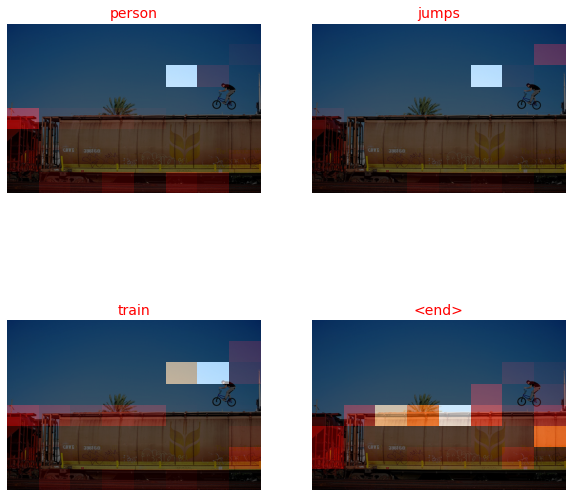

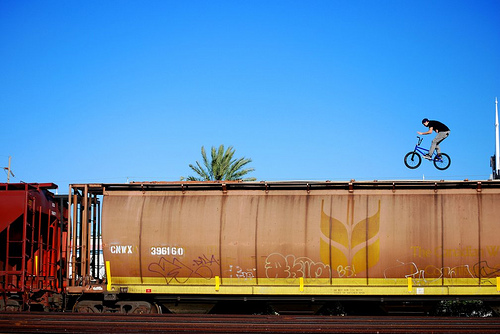

In [ ]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

# <p style="background-color:white;font-family:seoge print;color:slateblue ;font-size:100%;text-align:left;border-radius:20px 60px;">Test Image 4</p>

/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 53.455228370394636
Real Caption: snowboarder jumps over shed which is almost covered with snow
Prediction Caption: skier jumps over some snow covered with snow


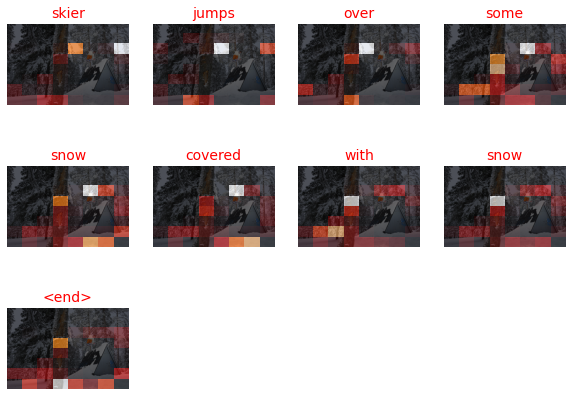

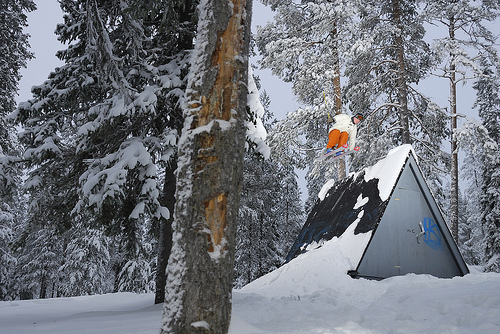

In [ ]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.35, 0.25, 0, 0))
Image.open(test_image)

# <p style="background-color:white;font-family:seoge print;color:slateblue ;font-size:100%;text-align:left;border-radius:20px 60px;">Test Image 5</p>

BELU score: 42.437284567694995
Real Caption: man stands next to strange rock formation with his arms in the air
Prediction Caption: man stands next to strange rock formation


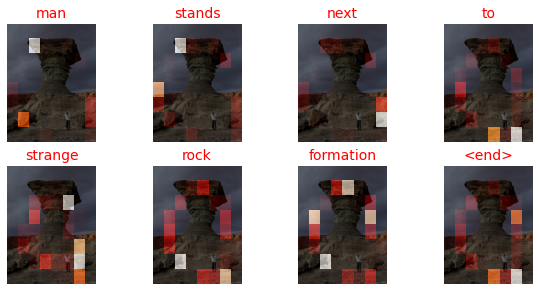

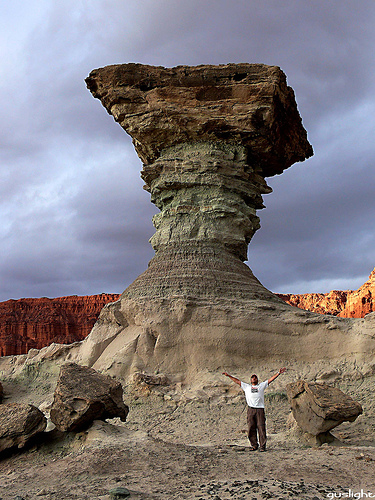

In [ ]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.5, 0, 0))
Image.open(test_image)

# <p style="background-color:white;font-family:seoge print;color:slateblue ;font-size:100%;text-align:left;border-radius:20px 60px;">Test Image 6</p>

BELU score: 100.0
Real Caption: hockey player in black and white uniform guarding the goal
Prediction Caption: hockey player in black and white uniform guarding the goal


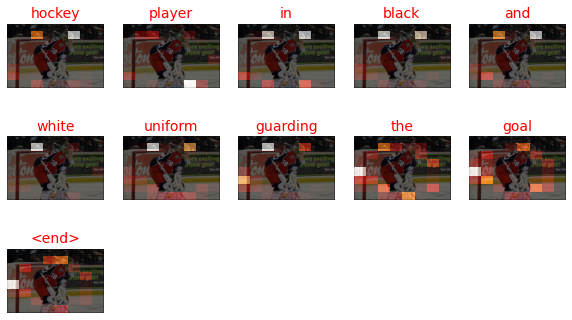

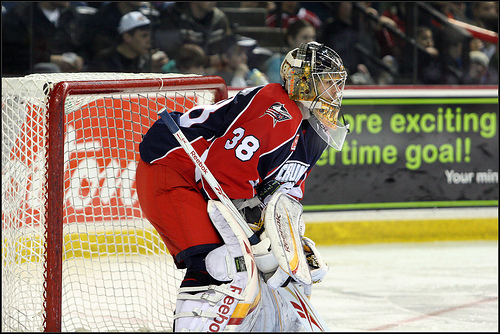

In [ ]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.25, 0.5, 0, 0))
Image.open(test_image)

# <p style="background-color:white;font-family:seoge print;color:slateblue ;font-size:100%;text-align:left;border-radius:20px 60px;">Test Image 7</p>

/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 42.728700639623405
Real Caption: dark skinned male in leather jacket sleeping
Prediction Caption: man in black leather jacket falls asleep on public transportation


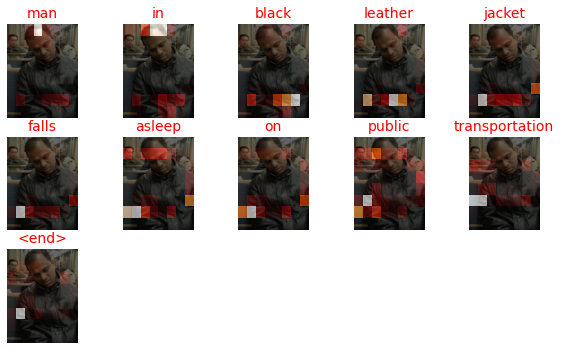

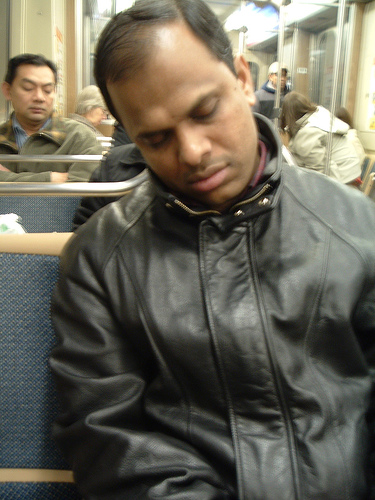

In [ ]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.25, 0.25, 0, 0))
Image.open(test_image)